# Study Overview

In this study, we are trying to analyze the psychophysiological data i.e. EDA and Temperature in 2 scenarios: 

* How EDA varies when the person is showering on his own and when the person is showering when the other is present.


      -whether the perceived pain and stress is less when the partner is present
* How EDA is changing over time while showering 
* How EDA and HR differ over the test periods (on day basis)

# Import Library

In [5]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu

sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load the data

## EDA

### Day 0

In [6]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_0 = pd.read_csv('data/exp_1/EDA.csv' , header= None)
fl_eda_0.columns  = ['eda']
fl_eda_freq_0 = fl_eda_0.iloc[1].values
print(len(fl_eda_0))
print('freq: ', fl_eda_freq_0)
fl_eda_0.head(10)

1232
freq:  [4.]


,eda
0,1.526949e+09
1,4.000000e+00
2,0.000000e+00
3,3.446160e-01
4,4.150760e-01
5,4.278870e-01
6,4.330120e-01
7,4.227630e-01
8,3.804870e-01
9,3.881730e-01


In [7]:
fl_init_time_0 = datetime.datetime.utcfromtimestamp(fl_eda_0.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_0

'2018-05-22 00:29:47'

In [8]:
fl_eda_0 = fl_eda_0.iloc[3:]
fl_eda_0.head(5)

,eda
3,0.344616
4,0.415076
5,0.427887
6,0.433012
7,0.422763


In [9]:
#create index 
fl_time_eda_0 = pd.date_range(start=fl_init_time_0, periods=len(fl_eda_0), freq=str(1/int(fl_eda_freq_0))+'S')
fl_time_eda_0

DatetimeIndex([       '2018-05-22 00:29:47', '2018-05-22 00:29:47.250000',
               '2018-05-22 00:29:47.500000', '2018-05-22 00:29:47.750000',
                      '2018-05-22 00:29:48', '2018-05-22 00:29:48.250000',
               '2018-05-22 00:29:48.500000', '2018-05-22 00:29:48.750000',
                      '2018-05-22 00:29:49', '2018-05-22 00:29:49.250000',
               ...
               '2018-05-22 00:34:51.750000',        '2018-05-22 00:34:52',
               '2018-05-22 00:34:52.250000', '2018-05-22 00:34:52.500000',
               '2018-05-22 00:34:52.750000',        '2018-05-22 00:34:53',
               '2018-05-22 00:34:53.250000', '2018-05-22 00:34:53.500000',
               '2018-05-22 00:34:53.750000',        '2018-05-22 00:34:54'],
              dtype='datetime64[ns]', length=1229, freq='250L')

In [10]:
fl_eda_0 = fl_eda_0.set_index(fl_time_eda_0, drop =True)
fl_eda_0.head()

,eda
2018-05-22 00:29:47.000,0.344616
2018-05-22 00:29:47.250,0.415076
2018-05-22 00:29:47.500,0.427887
2018-05-22 00:29:47.750,0.433012
2018-05-22 00:29:48.000,0.422763


In [11]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda_0 = fl_eda_0[12:-12]
fl_eda_0 = fl_eda_0.dropna()

print(len(fl_eda_0))
fl_eda_0.head()

1205


,eda
2018-05-22 00:29:50.000,0.431731
2018-05-22 00:29:50.250,0.430450
2018-05-22 00:29:50.500,0.418920
2018-05-22 00:29:50.750,0.402265
2018-05-22 00:29:51.000,0.381768


### Day 1

In [48]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_1 = pd.read_csv('data/exp_2/EDA.csv' , header= None)
fl_eda_1.columns  = ['eda']
fl_eda_freq_1 = fl_eda_1.iloc[1].values
print(len(fl_eda_1))
print('freq: ', fl_eda_freq_1)
fl_eda_1.head(10)

2120
freq:  [4.]


,eda
0,1.527038e+09
1,4.000000e+00
2,0.000000e+00
3,2.062570e-01
4,3.523020e-01
5,3.561460e-01
6,3.548650e-01
7,3.574270e-01
8,3.574270e-01
9,3.369290e-01


In [49]:
fl_init_time_1 = datetime.datetime.utcfromtimestamp(fl_eda_1.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_1

'2018-05-23 01:09:12'

In [50]:
fl_eda_1 = fl_eda_1.iloc[3:]
fl_eda_1.head(5)

,eda
3,0.206257
4,0.352302
5,0.356146
6,0.354865
7,0.357427


In [51]:
#create index 
fl_time_eda_1 = pd.date_range(start=fl_init_time_1, periods=len(fl_eda_1), freq=str(1/int(fl_eda_freq_1))+'S')
fl_time_eda_1

DatetimeIndex([       '2018-05-23 01:09:12', '2018-05-23 01:09:12.250000',
               '2018-05-23 01:09:12.500000', '2018-05-23 01:09:12.750000',
                      '2018-05-23 01:09:13', '2018-05-23 01:09:13.250000',
               '2018-05-23 01:09:13.500000', '2018-05-23 01:09:13.750000',
                      '2018-05-23 01:09:14', '2018-05-23 01:09:14.250000',
               ...
               '2018-05-23 01:17:58.750000',        '2018-05-23 01:17:59',
               '2018-05-23 01:17:59.250000', '2018-05-23 01:17:59.500000',
               '2018-05-23 01:17:59.750000',        '2018-05-23 01:18:00',
               '2018-05-23 01:18:00.250000', '2018-05-23 01:18:00.500000',
               '2018-05-23 01:18:00.750000',        '2018-05-23 01:18:01'],
              dtype='datetime64[ns]', length=2117, freq='250L')

In [52]:
fl_eda_1 = fl_eda_1.set_index(fl_time_eda_1, drop =True)
fl_eda_1.head()

,eda
2018-05-23 01:09:12.000,0.206257
2018-05-23 01:09:12.250,0.352302
2018-05-23 01:09:12.500,0.356146
2018-05-23 01:09:12.750,0.354865
2018-05-23 01:09:13.000,0.357427


In [53]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda_1 = fl_eda_1[12:-12]
fl_eda_1 = fl_eda_1.dropna()
print(len(fl_eda_1))
fl_eda_1.head()

2093


,eda
2018-05-23 01:09:15.000,0.354865
2018-05-23 01:09:15.250,0.356146
2018-05-23 01:09:15.500,0.353584
2018-05-23 01:09:15.750,0.352302
2018-05-23 01:09:16.000,0.353584


### Load lags

In [68]:
tags = pd.read_csv('data/exp_2/tags.csv' , header= None)
tags.columns  =  ['tagged_time']
tags.head()

,tagged_time
0,1.527038e+09
1,1.527038e+09
2,1.527038e+09
3,1.527038e+09


In [69]:
tags.tagged_time = [datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.000') for x in tags.tagged_time]


In [70]:
tags.tail()

,tagged_time
0,2018-05-23 01:12:30.000
1,2018-05-23 01:14:41.000
2,2018-05-23 01:17:58.000
3,2018-05-23 01:18:00.000


In [72]:
fl_day1_bath = fl_eda_1.loc[tags.tagged_time[1]:tags.tagged_time[2]]

In [73]:
fl_day1_bbath = fl_eda_1.loc[:tags.tagged_time[1]]

### Day 2

In [15]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_2 = pd.read_csv('data/exp_3/EDA.csv' , header= None)
fl_eda_2.columns  = ['eda']
fl_eda_freq_2 = fl_eda_2.iloc[1].values
print(len(fl_eda_2))
print('freq: ', fl_eda_freq_2)
fl_eda_2.head(10)

1664
freq:  [4.]


,eda
0,1.527124e+09
1,4.000000e+00
2,0.000000e+00
3,4.125140e-01
4,4.688830e-01
5,4.765690e-01
6,4.740070e-01
7,4.765690e-01
8,4.765690e-01
9,4.765690e-01


In [16]:
fl_init_time_2 = datetime.datetime.utcfromtimestamp(fl_eda_2.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_2

'2018-05-24 01:07:49'

In [17]:
fl_eda_2 = fl_eda_2.iloc[3:]
fl_eda_2.head(5)

,eda
3,0.412514
4,0.468883
5,0.476569
6,0.474007
7,0.476569


In [18]:
#create index 
fl_time_eda_2 = pd.date_range(start=fl_init_time_2, periods=len(fl_eda_2), freq=str(1/int(fl_eda_freq_2))+'S')
fl_time_eda_2

DatetimeIndex([       '2018-05-24 01:07:49', '2018-05-24 01:07:49.250000',
               '2018-05-24 01:07:49.500000', '2018-05-24 01:07:49.750000',
                      '2018-05-24 01:07:50', '2018-05-24 01:07:50.250000',
               '2018-05-24 01:07:50.500000', '2018-05-24 01:07:50.750000',
                      '2018-05-24 01:07:51', '2018-05-24 01:07:51.250000',
               ...
               '2018-05-24 01:14:41.750000',        '2018-05-24 01:14:42',
               '2018-05-24 01:14:42.250000', '2018-05-24 01:14:42.500000',
               '2018-05-24 01:14:42.750000',        '2018-05-24 01:14:43',
               '2018-05-24 01:14:43.250000', '2018-05-24 01:14:43.500000',
               '2018-05-24 01:14:43.750000',        '2018-05-24 01:14:44'],
              dtype='datetime64[ns]', length=1661, freq='250L')

In [19]:
fl_eda_2 = fl_eda_2.set_index(fl_time_eda_2, drop =True)
fl_eda_2.head()

,eda
2018-05-24 01:07:49.000,0.412514
2018-05-24 01:07:49.250,0.468883
2018-05-24 01:07:49.500,0.476569
2018-05-24 01:07:49.750,0.474007
2018-05-24 01:07:50.000,0.476569


In [20]:
# eda = eda.rolling(4).sum()
# fl_eda = fl_eda.iloc[::4,:]
fl_eda_2 = fl_eda_2[12:-12]
fl_eda_2 = fl_eda_2.dropna()
print(len(fl_eda_2))
fl_eda_2.head()

1637


,eda
2018-05-24 01:07:52.000,0.474007
2018-05-24 01:07:52.250,0.475288
2018-05-24 01:07:52.500,0.472726
2018-05-24 01:07:52.750,0.472726
2018-05-24 01:07:53.000,0.472726


### Visualization

#### Remove Outliers

In [21]:
fl_exp0 = fl_eda_0.copy()#example dataset of normally distributed data. 
fl_exp0['present'] = 1
fl_exp0= fl_exp0[np.abs(fl_exp0.eda-fl_exp0.eda.mean())<=(3*fl_exp0.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp0= fl_exp0[~(np.abs(fl_exp0.eda-fl_exp0.eda.mean())>(3*fl_exp0.eda.std()))] #or if you prefer the other way around

print(len(fl_exp0))
fl_exp0.head()


1195


,eda,present
2018-05-22 00:29:50.750,0.402265,1
2018-05-22 00:29:51.000,0.381768,1
2018-05-22 00:29:51.250,0.372800,1
2018-05-22 00:29:51.500,0.379206,1
2018-05-22 00:29:51.750,0.376643,1


In [22]:
fl_exp1 = fl_eda_1.copy()#example dataset of normally distributed data.
fl_exp1['present'] = 1
fl_exp1= fl_exp1[np.abs(fl_exp1.eda-fl_exp1.eda.mean())<=(3*fl_exp1.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp1= fl_exp1[~(np.abs(fl_exp1.eda-fl_exp1.eda.mean())>(3*fl_exp1.eda.std()))] #or if you prefer the other way around

print(len(fl_exp1))
fl_exp1.tail()


2044


,eda,present
2018-05-23 01:17:56.250,0.347178,1
2018-05-23 01:17:56.500,0.344616,1
2018-05-23 01:17:56.750,0.351021,1
2018-05-23 01:17:57.000,0.349740,1
2018-05-23 01:17:57.250,0.351021,1


In [23]:
fl_exp2 = fl_eda_2.copy()#example dataset of normally distributed data.
fl_exp2['present'] = 0
fl_exp2= fl_exp2[np.abs(fl_exp2.eda-fl_exp2.eda.mean())<=(3*fl_exp2.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp2= fl_exp2[~(np.abs(fl_exp2.eda-fl_exp2.eda.mean())>(3*fl_exp2.eda.std()))] #or if you prefer the other way around

print(len(fl_exp2))
fl_exp2.head()


1619


,eda,present
2018-05-24 01:07:52.000,0.474007,0
2018-05-24 01:07:52.250,0.475288,0
2018-05-24 01:07:52.500,0.472726,0
2018-05-24 01:07:52.750,0.472726,0
2018-05-24 01:07:53.000,0.472726,0


### Day 1


I consider the experiment is 3 minutes and the sampling frequencyf is 4Hz which is 0.25s per record. We can take 720 records based on this frequency. We then exclude the last 3 second which might be the dalay of the process of truning off the wristband. 

In turn we will first exclude the last 3 *4 = 12 records which include 720 + 12 = 732 records into our analysis as the experimental period every day .

In [24]:
fl_day0 = fl_exp0[-720:]
fl_day1 = fl_exp1[-720:]
fl_day2 = fl_exp2[-720:]

In [25]:
fl_day0 = np.squeeze(fl_day0)
fl_day1 = np.squeeze(fl_day1)
fl_day2 = np.squeeze(fl_day2)

## EDA Analysis

## CR 

 **r**: phasic component
     
 
 **p**: sparse SMNA driver of phasic component
     
     
 **t**: tonic component
     
     
 **l**: coefficients of tonic spline
     
     
 **d**: offset and slope of the linear drift term
 
 
 **e**: model residuals
 
 
 **obj**: value of objective function being minimized (eq 15 of paper)

### Day 0

In [26]:
y0 = np.asarray(fl_exp0.eda)
y0[:10]

array([0.402265, 0.381768, 0.3728  , 0.379206, 0.376643, 0.354865,
       0.340773, 0.362551, 0.370238, 0.359989])

In [27]:
yn0 = (y0 - y0.mean()) / y0.std()
Fs = 4.
[r0, p0, t0, l0, d0, e0, obj0] = cvxEDA.cvxEDA(yn0, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm0 = pl.arange(1., len(y0)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -5.6620e+02 -5.5722e+02  2e+03  5e+01  5e-01
 1: -5.7108e+02 -8.4583e+02  3e+02  7e+00  8e-02
 2: -5.7918e+02 -7.2185e+02  1e+02  3e+00  3e-02
 3: -5.8204e+02 -6.6191e+02  8e+01  1e+00  1e-02
 4: -5.8465e+02 -6.3243e+02  5e+01  6e-01  6e-03
 5: -5.8633e+02 -6.0907e+02  2e+01  2e-01  2e-03
 6: -5.8705e+02 -6.0092e+02  1e+01  1e-01  1e-03
 7: -5.8793e+02 -5.9198e+02  4e+00  2e-02  2e-04
 8: -5.8916e+02 -5.9003e+02  9e-01  3e-03  3e-05
 9: -5.8945e+02 -5.8982e+02  4e-01  7e-04  7e-06
10: -5.8962e+02 -5.8973e+02  1e-01  1e-04  1e-06
11: -5.8967e+02 -5.8970e+02  3e-02  2e-05  2e-07
12: -5.8968e+02 -5.8969e+02  8e-03  3e-06  3e-08
13: -5.8969e+02 -5.8969e+02  2e-03  6e-07  6e-09
14: -5.8969e+02 -5.8969e+02  3e-04  7e-08  7e-10
15: -5.8969e+02 -5.8969e+02  3e-05  2e-09  2e-11
16: -5.8969e+02 -5.8969e+02  2e-06  7e-11  7e-13
17: -5.8969e+02 -5.8969e+02  3e-08  1e-12  1e-13
Optimal solution found.


In [28]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

In [29]:
print(obj0)

[7.81014068]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


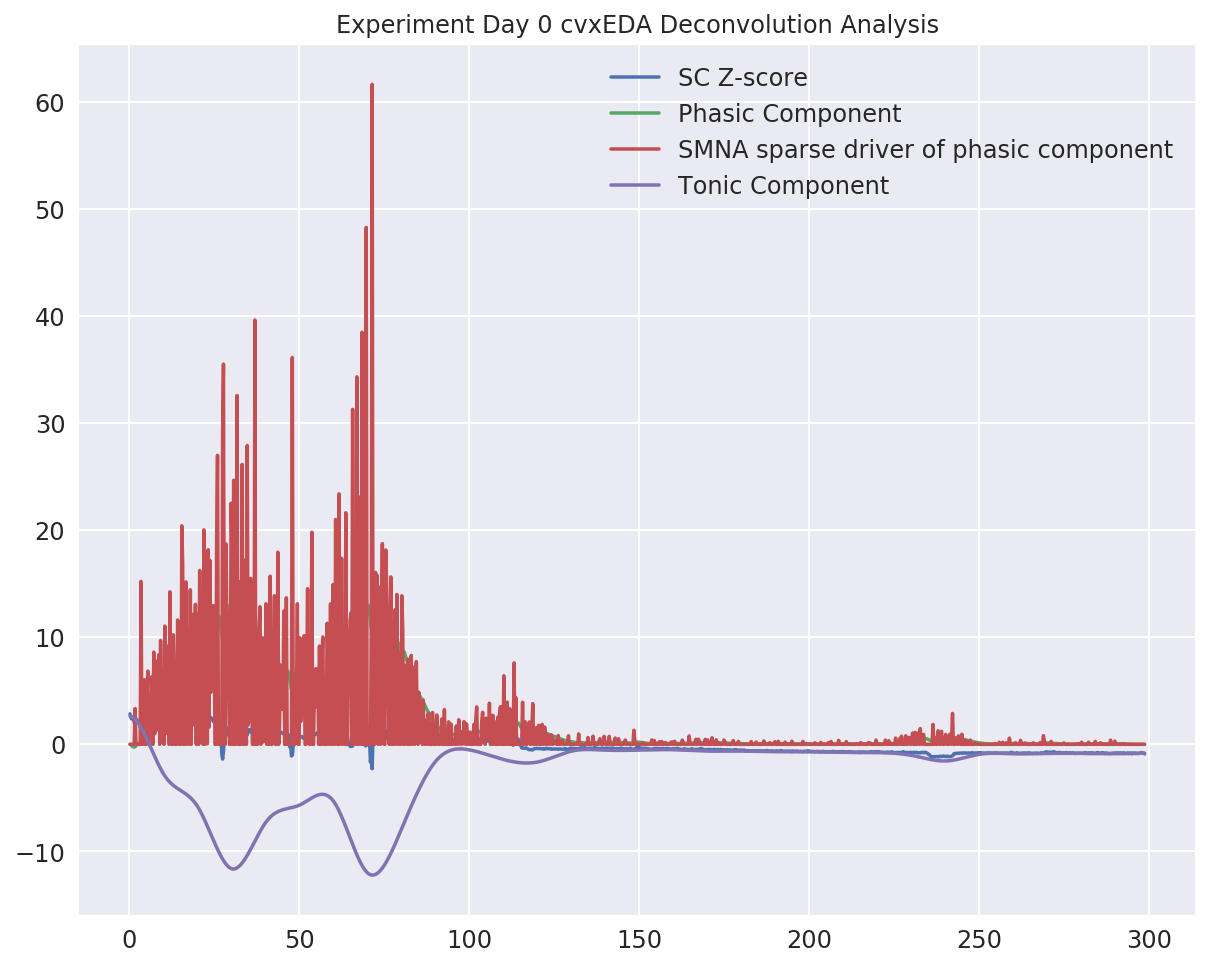

In [30]:
pl.hold(True)
pl.plot(tm0, yn0)
pl.plot(tm0, r0)
pl.plot(tm0, p0)
pl.plot(tm0, t0)
pl.title('Experiment Day 0 cvxEDA Deconvolution Analysis')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           'Tonic Component'])

pl.show()

# Feature Extraction Function 

In [31]:
def eda_feature(df):
    y = np.asarray(df.eda)
    present = np.mean(df.present)
    yn = (y - y.mean()) / y.std()
    Fs = 4.
    [r, p, t, l, d, e, obj] = cvxEDA.cvxEDA(yn, 1./Fs)
    tm = pl.arange(1., len(y)+1.) / Fs
    
    y_mean = np.mean(yn)
    r_mean = np.mean(r)
    p_mean = np.mean(p)
    t_mean = np.mean(t)

    y_stdev = np.std(yn)
    r_stdev = np.std(r)
    p_stdev = np.std(p)
    t_stdev = np.std(t)

    y_max = np.amax(yn)
    r_max = np.amax(r)
    p_max = np.amax(p)
    t_max = np.amax(t)

    feature_list=[]
    feature_list.extend((y_mean,r_mean,p_mean,t_mean,
                    y_stdev,r_stdev,p_stdev,t_stdev,
                    y_max,r_max,p_max,t_max,
                    present))
    return feature_list
    

In [32]:
eda_feature(fl_exp1)

     pcost       dcost       gap    pres   dres
 0: -8.2592e+02 -7.8734e+02  6e+03  7e+01  9e-01
 1: -8.5020e+02 -1.9960e+03  2e+03  2e+01  2e-01
 2: -8.8247e+02 -1.4932e+03  7e+02  6e+00  8e-02
 3: -9.0155e+02 -1.1958e+03  3e+02  2e+00  3e-02
 4: -9.1418e+02 -1.1221e+03  2e+02  1e+00  1e-02
 5: -9.2560e+02 -1.0424e+03  1e+02  5e-01  6e-03
 6: -9.3454e+02 -1.0122e+03  8e+01  3e-01  3e-03
 7: -9.4149e+02 -9.7753e+02  4e+01  9e-02  1e-03
 8: -9.4601e+02 -9.6167e+02  2e+01  3e-02  4e-04
 9: -9.4864e+02 -9.5430e+02  6e+00  1e-02  1e-04
10: -9.4979e+02 -9.5171e+02  2e+00  1e-03  2e-05
11: -9.5045e+02 -9.5076e+02  3e-01  2e-04  2e-06
12: -9.5056e+02 -9.5061e+02  5e-02  3e-05  3e-07
13: -9.5058e+02 -9.5059e+02  5e-03  2e-06  3e-08
14: -9.5059e+02 -9.5059e+02  3e-04  1e-07  2e-09
15: -9.5059e+02 -9.5059e+02  1e-05  5e-09  6e-11
16: -9.5059e+02 -9.5059e+02  3e-07  6e-11  7e-13
Optimal solution found.


[4.672061824176001e-15,
 13.014625288489981,
 10.089856297171147,
 -13.014625288489977,
 1.0,
 3.386776534631157,
 12.756810676777393,
 3.7674524079676823,
 3.142675340539792,
 23.669112816303077,
 82.1602016503773,
 2.953321430253485,
 1.0]

In [33]:
var = [fl_exp0, fl_exp1, fl_exp2]
feature_arr = [eda_feature(x) for x in var]

     pcost       dcost       gap    pres   dres
 0: -5.6620e+02 -5.5722e+02  2e+03  5e+01  5e-01
 1: -5.7108e+02 -8.4583e+02  3e+02  7e+00  8e-02
 2: -5.7918e+02 -7.2185e+02  1e+02  3e+00  3e-02
 3: -5.8204e+02 -6.6191e+02  8e+01  1e+00  1e-02
 4: -5.8465e+02 -6.3243e+02  5e+01  6e-01  6e-03
 5: -5.8633e+02 -6.0907e+02  2e+01  2e-01  2e-03
 6: -5.8705e+02 -6.0092e+02  1e+01  1e-01  1e-03
 7: -5.8793e+02 -5.9198e+02  4e+00  2e-02  2e-04
 8: -5.8916e+02 -5.9003e+02  9e-01  3e-03  3e-05
 9: -5.8945e+02 -5.8982e+02  4e-01  7e-04  7e-06
10: -5.8962e+02 -5.8973e+02  1e-01  1e-04  1e-06
11: -5.8967e+02 -5.8970e+02  3e-02  2e-05  2e-07
12: -5.8968e+02 -5.8969e+02  8e-03  3e-06  3e-08
13: -5.8969e+02 -5.8969e+02  2e-03  6e-07  6e-09
14: -5.8969e+02 -5.8969e+02  3e-04  7e-08  7e-10
15: -5.8969e+02 -5.8969e+02  3e-05  2e-09  2e-11
16: -5.8969e+02 -5.8969e+02  2e-06  7e-11  7e-13
17: -5.8969e+02 -5.8969e+02  3e-08  1e-12  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dre

# Two-sample wilcoxon test (a.k.a Mann Whitney U)

In [41]:
u, p_value = mannwhitneyu(feature_arr[1], feature_arr[2])
print("P-vale of two-sample wilcoxon-test", p_value)

P-vale of two-sample wilcoxon-test 0.03631261734282787


# Two-sample t-test


In [ ]:
t_statistic, p_value = ttest_1samp(post - pre, 0)